# Finally learn to annotate (place) text in any part of the plot
## God help anyone who reads Matplotlib documentation
<img src='images/plotting_guy.jpg'></img>

### Motivation <small id='motiv'></small>
Every single tutorial or course I took did not care to spend more than 10 minutes to explain how to control annotations in Matplotlib. If I googled the topic, the first 5 or 6 are all from Matplotlib documentation, the rest are just slightly altered versions of it 🤦‍♂️.

While I was writing an article about styling plots, I realized that the topic was too big to fit into a single section. I gave a brief intro there and decided to write a separate article. So, here I am, teaching how to annotate any plot in fully controlled manner in less than 9 minutes. Enjoy!

### Overview
1. [Motivation](#motiv)
2. [Setup](#setup)
3. [Basic text control](#text_basic)
4. [Moving the text while keeping the reference point](#keep_reference)
5. [Pointing with arrows](#arrows)
6. [Putting a box around text](#box)
7. [Getting Fancy, annotating a line plot](#fancy)

### Setup <small id='setup'></small>

In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('talk')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

I will be using two datasets downloaded from Kaggle and one preloaded dataset from Seaborn. First one is the [Nobel Prize](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fnobelfoundation%2Fnobel-laureates) winners data from 1901 to 2016 and the [stocks](https://www.kaggle.com/dgawlik/nyse/download) dataset contains stock prices for about 500 companies for some period of time.

In [2]:
# Load sample data
nobel = pd.read_csv('data/nobel.csv', parse_dates=['birth_date'])
stocks = pd.read_csv('data/prices-split-adjusted.csv',
                     parse_dates=['date'],
                     index_col='date')
cars = sns.load_dataset('mpg')

### Basic text control <small id='text_basic'></small>

Let's start by placing text in an empty plot:

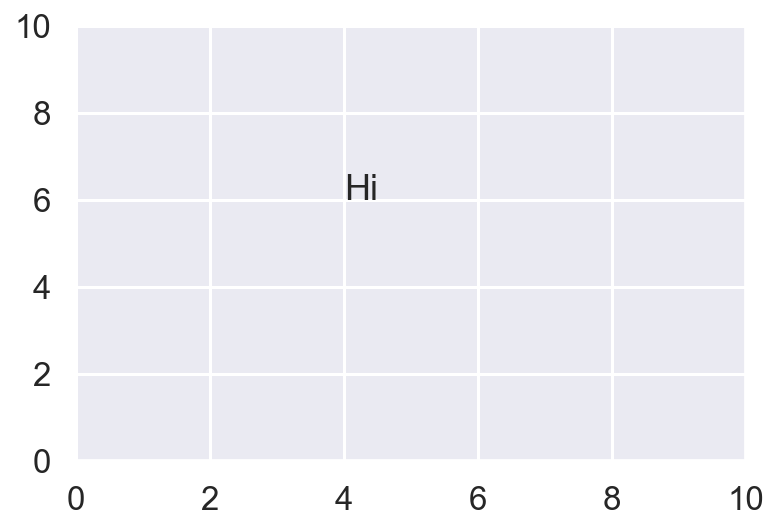

In [3]:
# Use a gridded style
sns.set_style('darkgrid')

# Create an empty plot
fig, ax = plt.subplots()
# Make the figure a 10 by 10 grid
ax.set(xlim=(0, 10), ylim=(0, 10))
# Placing the text
ax.annotate(text='Hi', xy=(4, 6), xycoords='data')
plt.show();

To place the text, we should first set the coordinate type. There are several types available in Matplotlib but the most intuitive and easy one is `data`. By setting `xycoords` to `data`, we are telling that we want to locate points depending on the values of `x` and `y` axis. Also, we want the origin of the coordinate at (0, 0). So, when I locate the point (2, 2) from our empty figure, I am telling you to count the units based on our axis ticks. There are options to set the coordinates for pixels or the fraction of axis length but it is hard to work in those coordinates. So, for the rest of the article we will stick to `data`. 

Next, we need the reference point. Reference point is the point of interest in our data. It is specified using `xy` parameter. When I set `xy` to x=4, y=6 (again, based on our axis ticks) I am telling the text to appear at exactly that location. 

Let's strengthen this concept a little further. I will create a scatter plot using the `cars` dataset to compare the horsepower vs. weight of cars encoded with their acceleration (time it takes to reach 100 km/h in seconds):

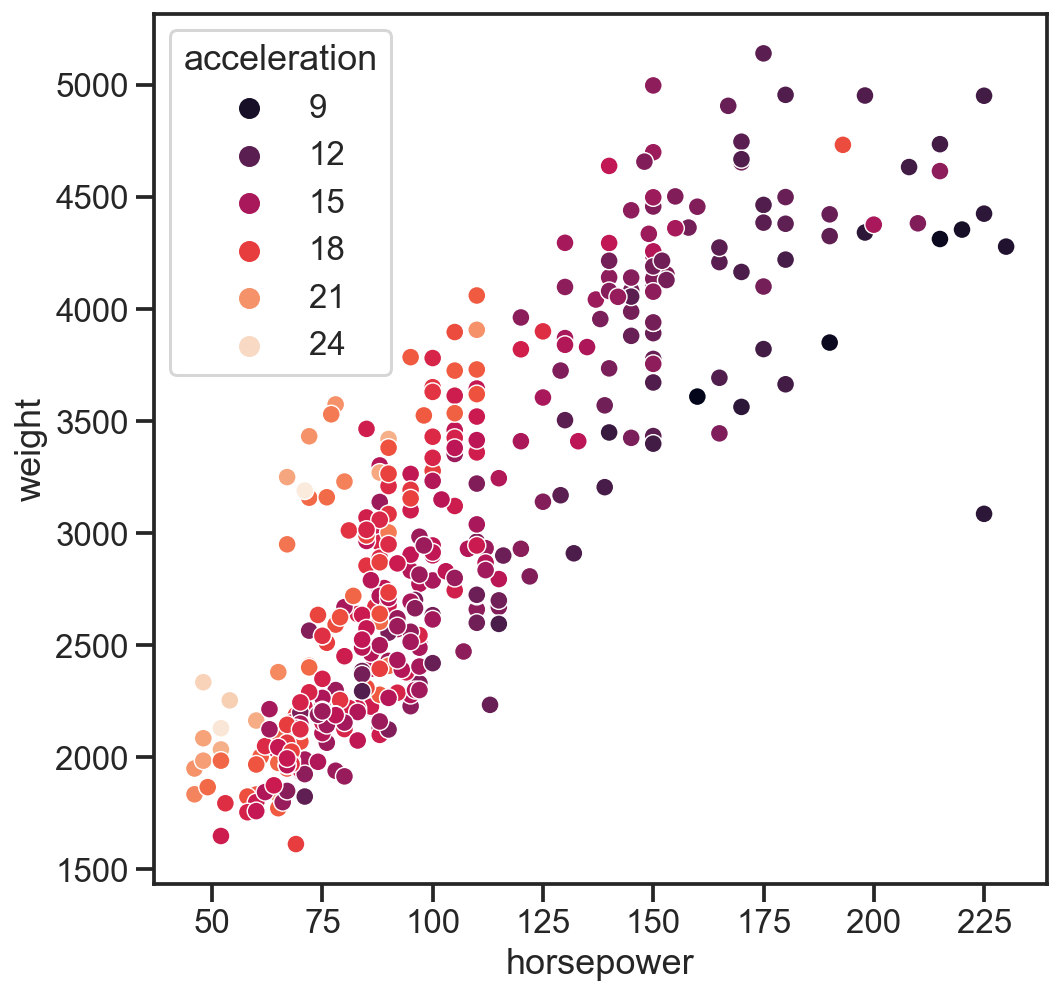

In [4]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(8, 8))
# Create a scatter plot
sns.scatterplot(x='horsepower',
                y='weight',
                data=cars,
                hue='acceleration',
                ax=ax,
                palette='rocket');

From the plot, we can see that there are some cars with acceleration as 9-12 (darkest points). We want to point this out by placing a text onto one of those points. We choose one of the fastest cars as a reference point and will find its coordinate. We will do so by using filtering on our dataframe:

In [5]:
# Filter cars with acceleration less than 10 seconds
fastest_cars = cars.query("acceleration < 9")
fastest_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340


As you see there are three cars matching our filter. Let's choose one with `id` 11, because it is the fastest. As you remember, on the `XAxis` and `YAxis` we had horsepower and weight as units, respectively. So we will use those variables of the car with `id` 11, which is (160, 3609). Let's annotate:

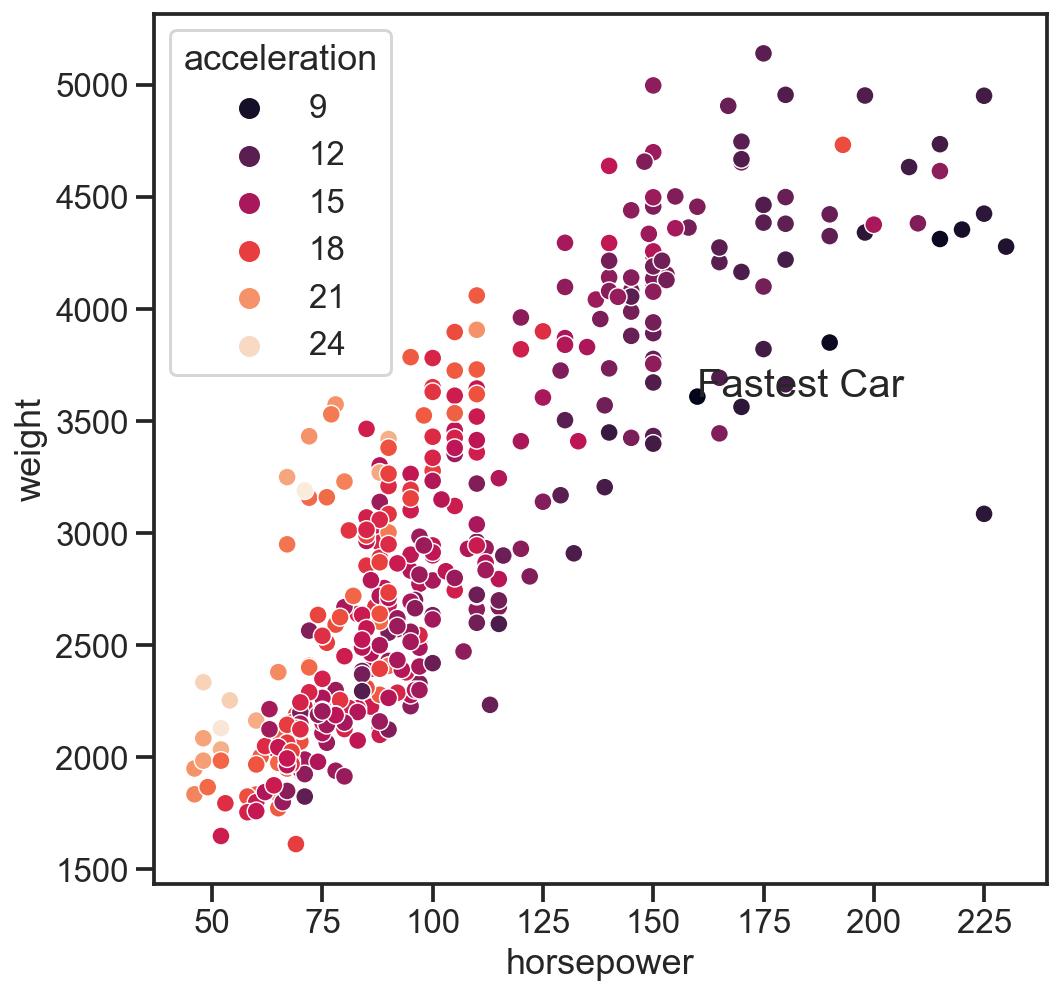

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
# Create a scatter plot
sns.scatterplot(x='horsepower',
                y='weight',
                data=cars,
                hue='acceleration',
                ax=ax,
                palette='rocket')
plt.annotate(text='Fastest Car', xy=(160, 3609), xycoords='data', fontsize=20)
plt.show();

OK, we got our text but it is placed right on top of the point. It would not be clear to others which point we are referencing. So, what we need to do is to move the text to a more clear part of the plot, like bottom right. But, we need to do it in such a way that Matplotlib knows we are still referencing that particular dot.

### Moving the text while keeping the reference point <small id='keeping_reference'></small>

Let's see the method in the empty plot case:

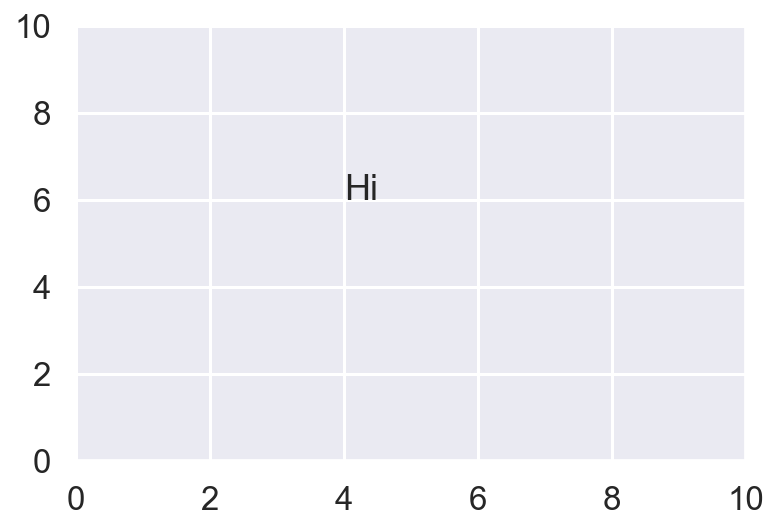

In [7]:
# Use a gridded style
sns.set_style('darkgrid')

# Create an empty plot
fig, ax = plt.subplots()
# Make the figure a 10 by 10 grid
ax.set(xlim=(0, 10), ylim=(0, 10))
# Placing the text
ax.annotate(text='Hi', xy=(4, 6), xycoords='data')
plt.show();

We want to move the text `Hi` to some other location but still referencing the point (4, 6). To do that we will use two other parameters, `xytext` and `textcoords`. I will move the text a little to the left and a little above and still keep the original text for comparison:

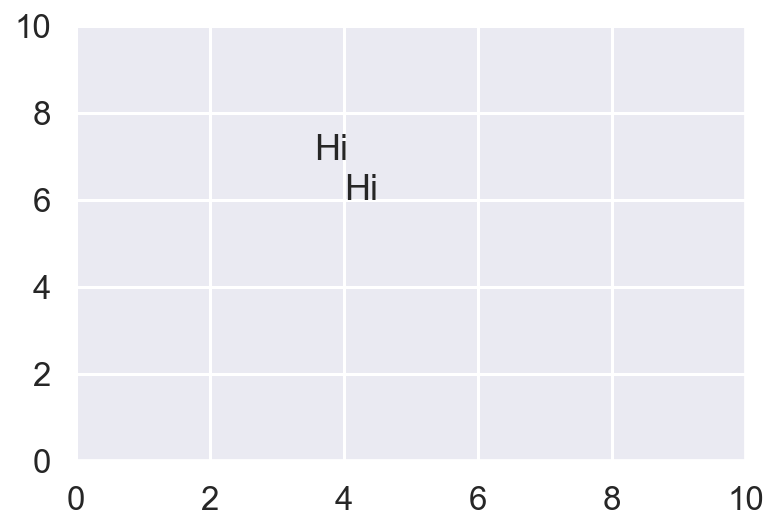

In [8]:
# Create an empty plot
fig, ax = plt.subplots()
# Make the figure a 10 by 10 grid
ax.set(xlim=(0, 10), ylim=(0, 10))

# Original text
ax.annotate(text='Hi', xy=(4, 6), xycoords='data')
# Move little above and little to the left
ax.annotate(text='Hi',
            xy=(4, 6),
            xycoords='data',
            xytext=(-15, 20),
            textcoords='offset points')
plt.show();

Now we have two texts, referencing the same point but at different locations. To move the text away from the reference point which is (4, 6), we set the `textcoords` to `offset points`. This will set the reference point (4, 6) as the origin  and move the text relative to that position. So, when I set `xytext` to (-15, 20), I am telling the text to move 15 points in the left direction and 20 points upwards relative to (4, 6). Note that the coordinates of the text does not depend on our data, it is measured as small __points__. Let's now see the plot without the original text:

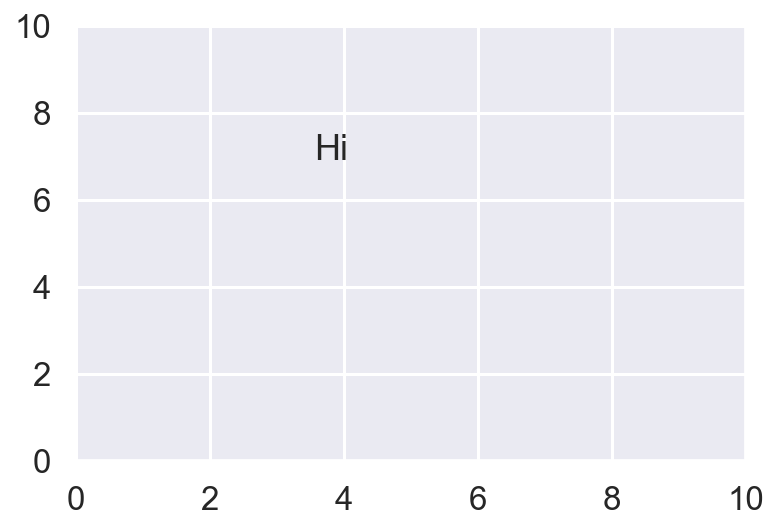

In [9]:
# Create an empty plot
fig, ax = plt.subplots()
# Make the figure a 10 by 10 grid
ax.set(xlim=(0, 10), ylim=(0, 10))

# Reference the point (4, 6) but place the text
# 15 points to the left and 20 points to the right of `xy`
ax.annotate(text='Hi',
            xy=(4, 6),
            xycoords='data',
            xytext=(-15, 20),
            textcoords='offset points')
plt.show();

Getting back to our cars problem, now we know how to move the text away from the reference point. Let's move 'Fastest Car' text to another cleaner location:

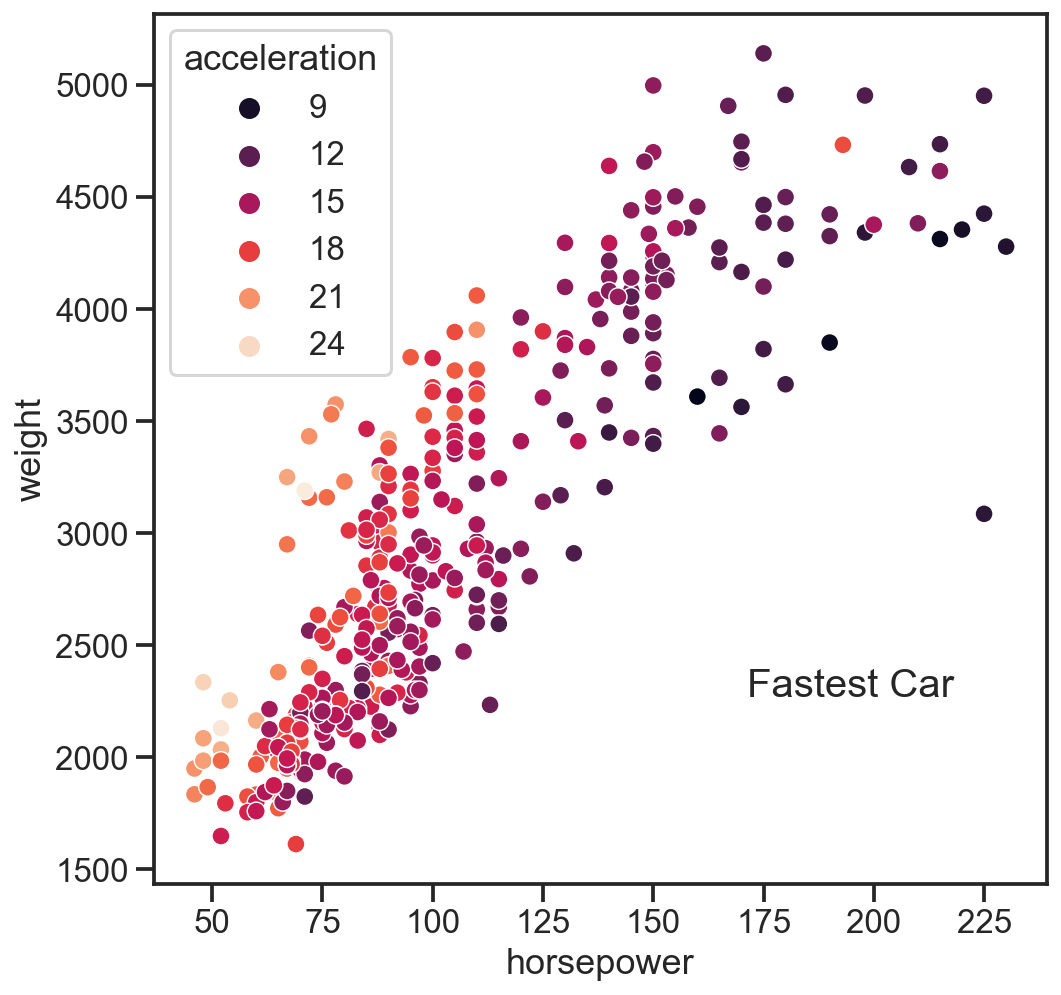

In [10]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(8, 8))
# Create a scatter plot
sns.scatterplot(x='horsepower',
                y='weight',
                data=cars,
                hue='acceleration',
                ax=ax,
                palette='rocket')
ax.annotate(text='Fastest Car',
            xy=(160, 3609),
            xycoords='data',
            fontsize=20,
            xytext=(25, -150),
            textcoords='offset points')
plt.show();

Now we have the text in a cleaner space. But we have another problem. If someone looked at our plot they would not know which dot is the fastest car. This is where arrows will be useful.

### Pointing with arrows <small id='arrows'></small>

Putting an arrow between the reference point and the text is very easy. In our `annotate()` function, we add a new parameter called `arrowprops`:

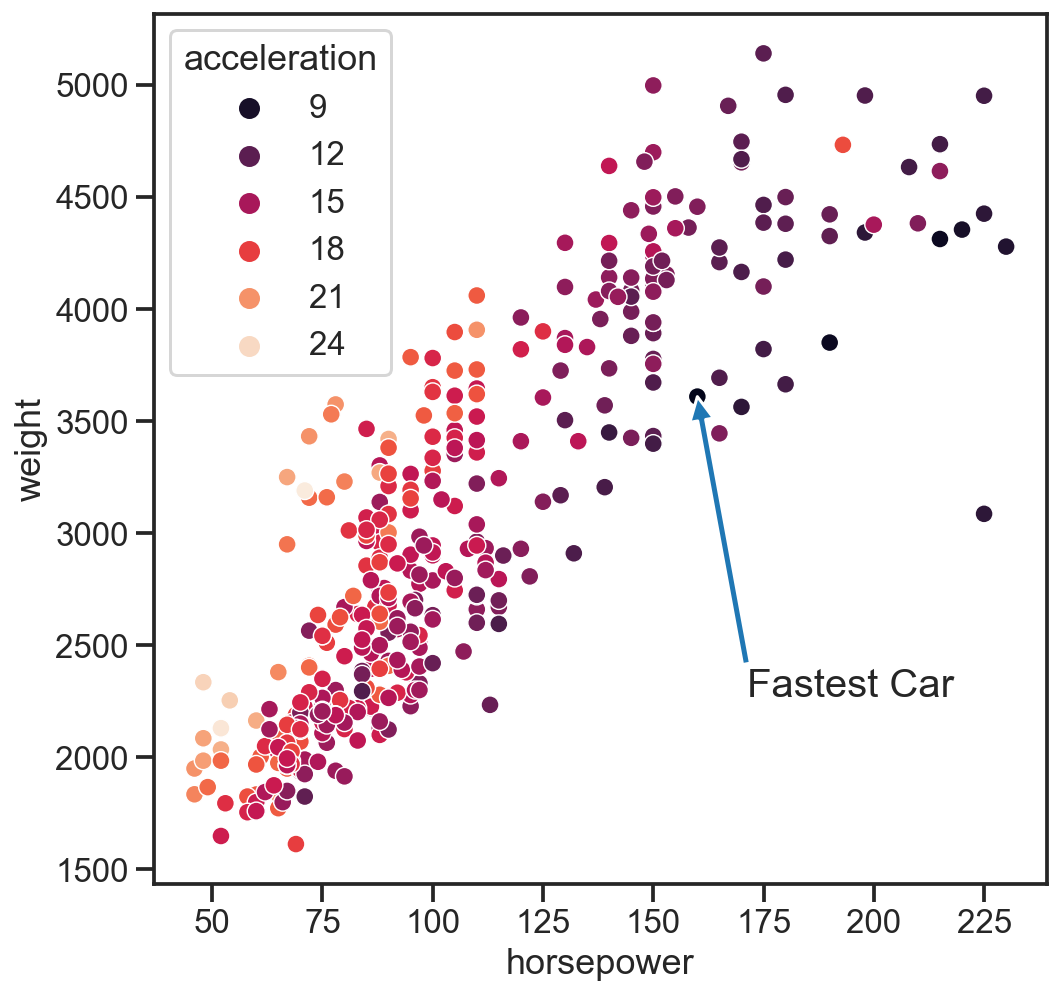

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
# Create a scatter plot
sns.scatterplot(x='horsepower',
                y='weight',
                data=cars,
                hue='acceleration',
                ax=ax,
                palette='rocket')
# Reference the fastest car
ax.annotate(text='Fastest Car',
            xy=(160, 3609),
            xycoords='data',
            fontsize=20,
            xytext=(25, -150),
            textcoords='offset points',
            arrowprops={})
plt.show();

Awesome, the arrow is pointing exactly to the fastest car. To connect the reference point and the text automatically, we pass an empty dictionary to `arrowprops`, this will create an arrow automatically. Now, even though we have what we wanted, let's give the text and the arrow some formatting:

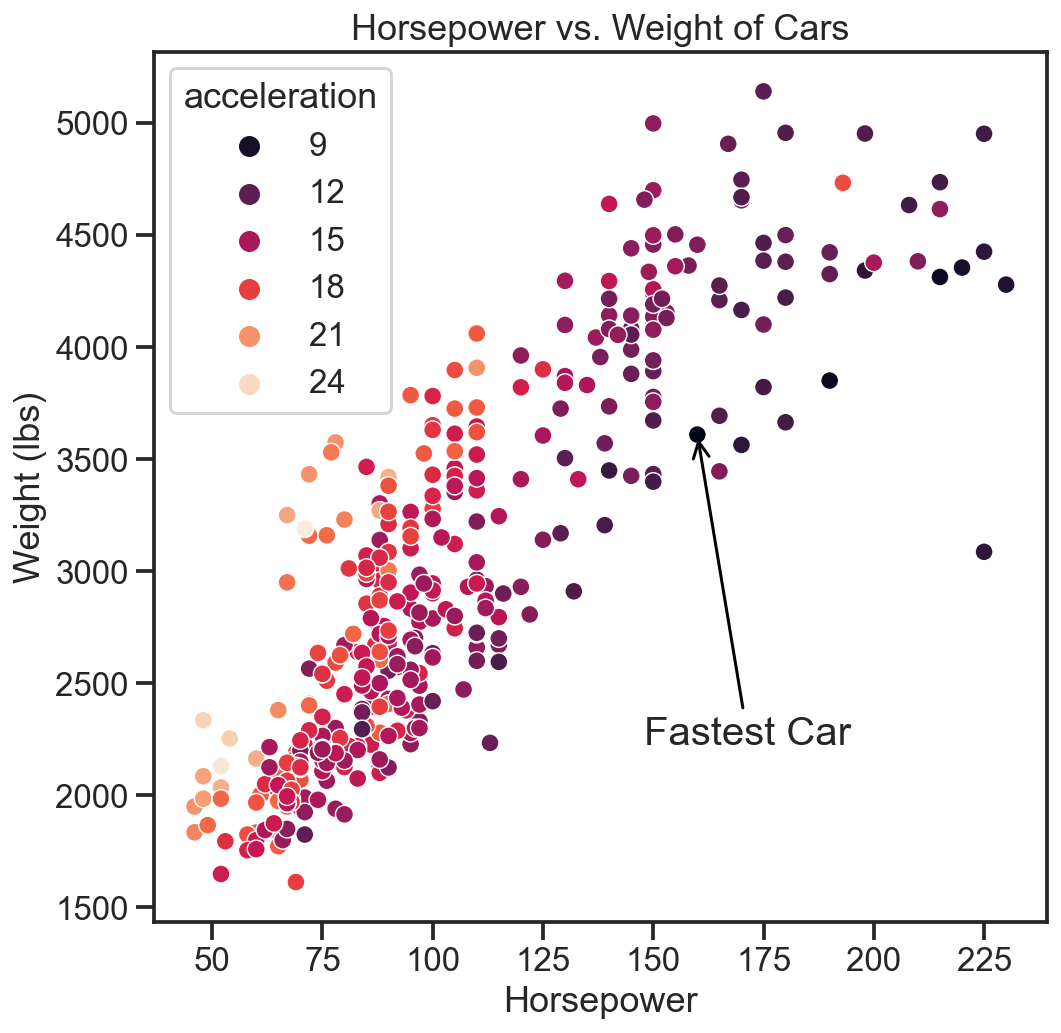

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
# Create a scatter plot
sns.scatterplot(x='horsepower',
                y='weight',
                data=cars,
                hue='acceleration',
                ax=ax,
                palette='rocket')
# Reference the fastest car
ax.annotate(
    text='Fastest Car',
    xy=(160, 3609),
    xycoords='data',
    fontsize=20,
    xytext=(25, -150),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->', color='black'),  # Use color black
    horizontalalignment='center',  # Center horizontally
    verticalalignment='center')  # Center vertically
ax.set(xlabel='Horsepower',
       ylabel='Weight (lbs)',
       title='Horsepower vs. Weight of Cars')
plt.show();

That's a little better. I think it you are clear on how to control the alignment of text. For arrow styles, there are many options. I suggest you go to [this](https://matplotlib.org/3.3.2/tutorials/text/annotations.html#basic-annotation) page of Matplotlib documentation to see all the available ones (sorry, you have to).

### Putting a box around text <small id='box'></small>

Honestly, I am not a big fan of boxes of Matplotlib. Their built-in styles are not pretty and building your own box style sounds more work than it is worth. But, anyway, I decided to give you a basic idea. Not to ruin our beautiful plot there, I will show an example on an empty plot:

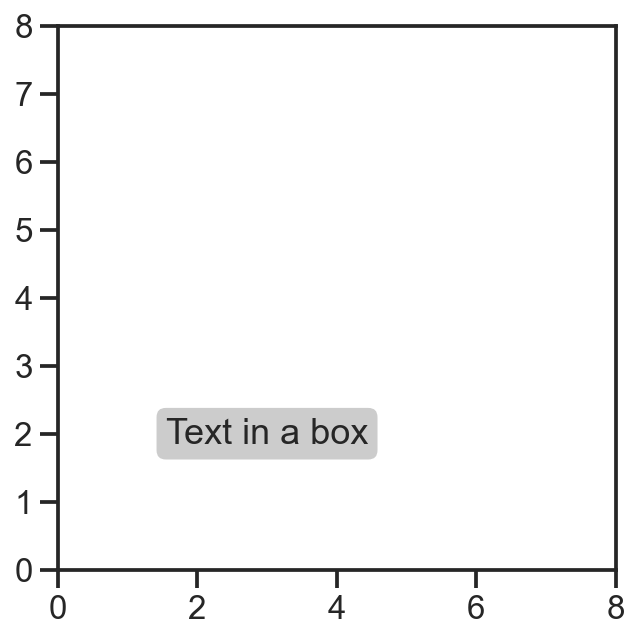

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlim=(0, 8), ylim=(0, 8))
ax.annotate('Text in a box',
            xy=(3, 2),
            xycoords='data',
            bbox=dict(boxstyle='round', fc='0.8'),
            ha='center',
            va='center')
plt.show();

To create a box with default styles (which are really ugly), just pass an empty dictionary to `bbox` argument. If you want to customize further, you can use many of the available arguments and pass them into a dictionary. Two of those arguments are `boxstyle` and `fc` (face color). If you are dead set on using boxes, here is the [list](https://matplotlib.org/3.3.2/gallery/text_labels_and_annotations/annotation_demo.html) of available styles.

### Getting Fancy, annotating a line plot <small id='fancy'></small>

It is time we bring up the `stocks` dataset. I will create a line plot comparing the stock prices of Amazon, Apple, Facebook and Google. And I will show you how to annotate the important points. Here is the dataset:

In [14]:
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


Now, let's draw the line plot. I will use the close price on the `YAxis` and the date on the `XAxis`:

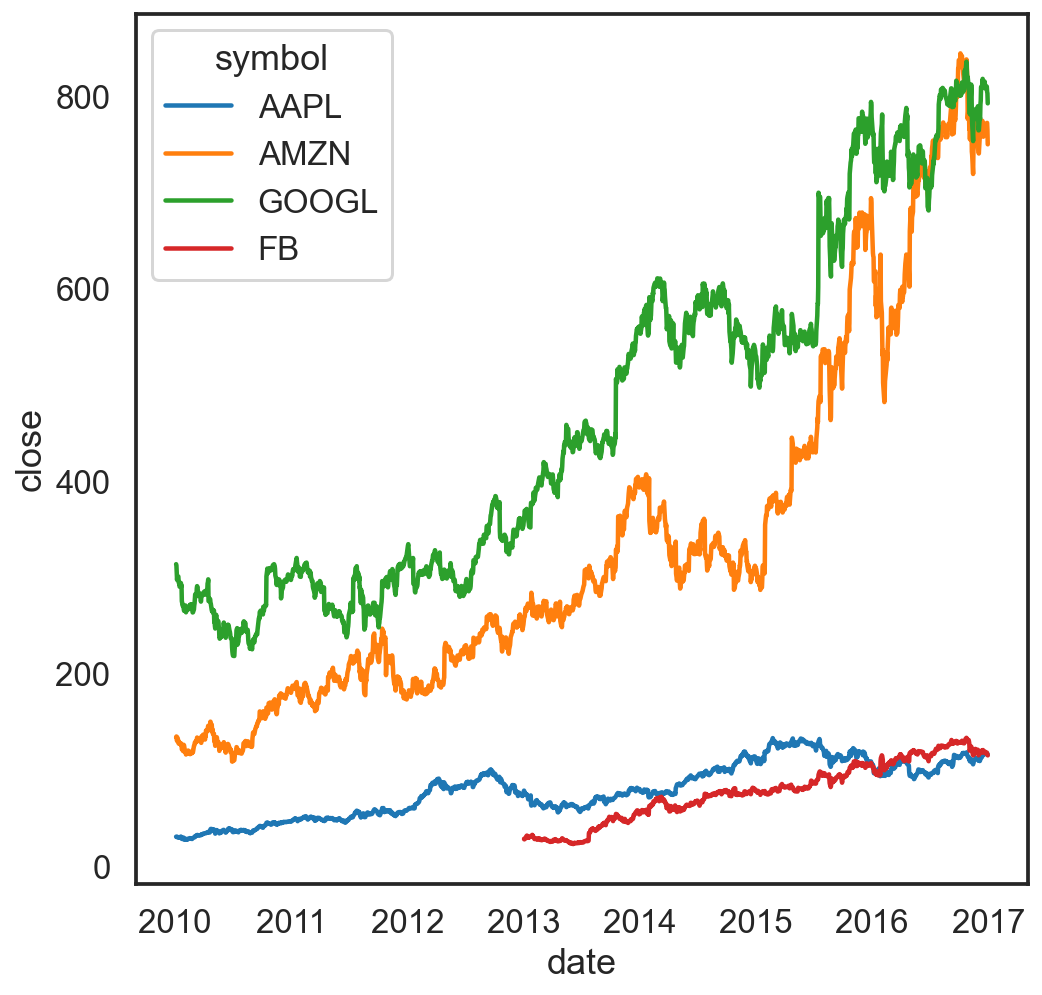

In [15]:
# Filter only for Amazon, Apple, Google, Facebook
big_four = stocks[stocks['symbol'].isin(['AMZN', 'AAPL', 'GOOGL', 'FB'])]

# Create a line plot with the close price on the y axis
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(x=big_four.index, y='close', data=big_four, hue='symbol', ax=ax)
plt.show();

From the plot, we see that the data is grouped into two. The points of interest would be when Amazon prices caught up with Google and when Facebook caught up with Apple. To find their coordinates, we should subset our data when the close prices were equal in the two groups. We will need to work on this a bit:

In [16]:
# Amazon > Google
amazon_stock = big_four.query('symbol == "AMZN"') \
            .reset_index()[['date', 'symbol', 'close']].set_index('date')
google_stock = big_four.query('symbol == "GOOGL"') \
            .reset_index()[['date', 'symbol', 'close']].set_index('date')

# Merge the stocks of two companies
amzn_ggl = amazon_stock.merge(google_stock,
                              on='date',
                              suffixes=('_amzn', '_ggl'))

# Subset for rows where close prices match
price_match = amzn_ggl[((amzn_ggl['close_amzn'] - amzn_ggl['close_ggl']) < 1)
                       & ((amzn_ggl['close_ggl'] < amzn_ggl['close_amzn']))]
price_match

,symbol_amzn,close_amzn,symbol_ggl,close_ggl
date,,,,
2016-06-22,AMZN,710.599976,GOOGL,710.469971
2016-10-26,AMZN,822.590027,GOOGL,822.099976
2016-11-22,AMZN,785.330017,GOOGL,785.000000
2016-11-25,AMZN,780.369995,GOOGL,780.229980


First, we subset our data into two dataframes, one for Google and one for Amazon. Then, we join the two dataframes because the resulting dataframe will have the close prices side by side. This allows us to compare the close prices. In the final step, we search for dates that had less than 1 dollar difference for the prices. This will give four dates where Amazon surpassed Google and we will choose the earliest date, which is 22nd of June. That date will become the x value in our coordinate. We can choose either of the prices for the y coordinate. Let's choose Amazon's. This will result in these coordinates - ('2016-06-22', 710.599976). We will use these coordinates to create a reference point:

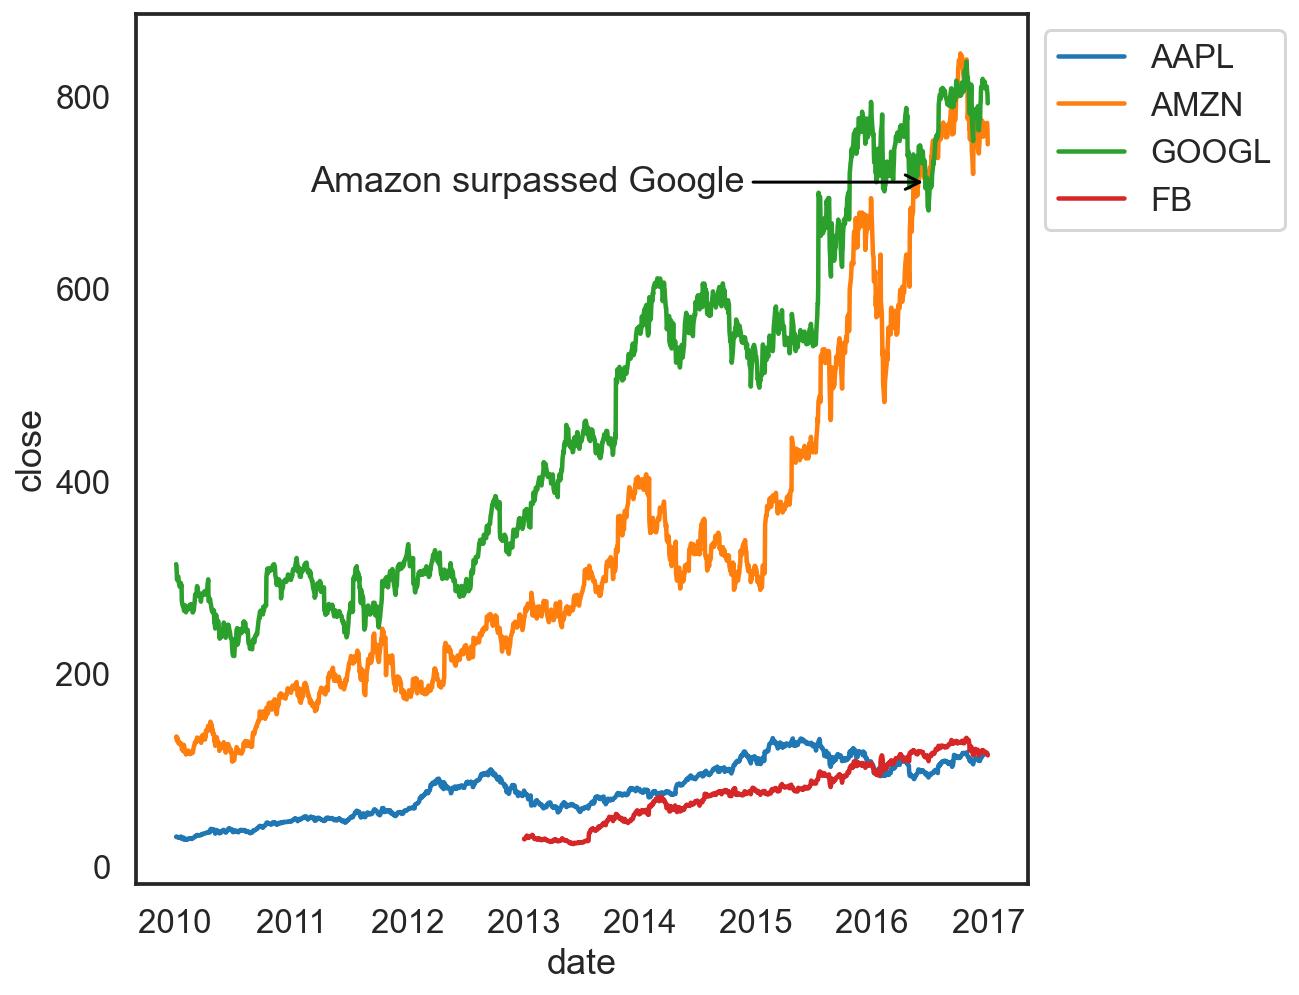

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
# Line plot
sns.lineplot(x=big_four.index, y='close', data=big_four, hue='symbol', ax=ax)
# Annotate Amazon > Google
ax.annotate('Amazon surpassed Google',
            xy=('2016-06-22', 710.599976),
            xycoords='data',
            xytext=(-200, 0),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center')
# Move the legen outside of the axes
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show();

Now, let's repeat the same operations for Facebook, Apple and add their annotations:

In [18]:
# Facebook > Apple
fb_stock = big_four.query('symbol == "FB"') \
            .reset_index()[['date', 'symbol', 'close']].set_index('date')
apple_stock = big_four.query('symbol == "AAPL"') \
            .reset_index()[['date', 'symbol', 'close']].set_index('date')

# Merge the stocks of two companies
fb_aapl = fb_stock.merge(apple_stock, on='date', suffixes=('_fb', '_aapl'))

# Subset for rows where close prices match
price_match = fb_aapl[((fb_aapl['close_fb'] - fb_aapl['close_aapl']) < 1)
                      & ((fb_aapl['close_fb'] > fb_aapl['close_aapl']))]
price_match

,symbol_fb,close_fb,symbol_aapl,close_aapl
date,,,,
2016-01-05,FB,102.730003,AAPL,102.709999
2016-01-08,FB,97.330002,AAPL,96.959999
2016-04-12,FB,110.610001,AAPL,110.440002
2016-12-23,FB,117.269997,AAPL,116.519997
2016-12-27,FB,118.010002,AAPL,117.260002
2016-12-28,FB,116.919998,AAPL,116.760002


For Facebook and Apple, close prices with the difference of 1 are on many days. To find the earliest date that Facebook surpassed Apple, we will use another function called `nsmallest()` which returns the n smallest values from a dataframe column:

In [19]:
price_match.reset_index().nsmallest(n=1, columns='date')

,date,symbol_fb,close_fb,symbol_aapl,close_aapl
0,2016-01-05,FB,102.730003,AAPL,102.709999


So, the first date the event happened was on the 5th of January, 2016. We can choose Facebook's close price for the y value. Our final coordinate is ('2016-01-05', 102.730003). Let's add it to our plot:

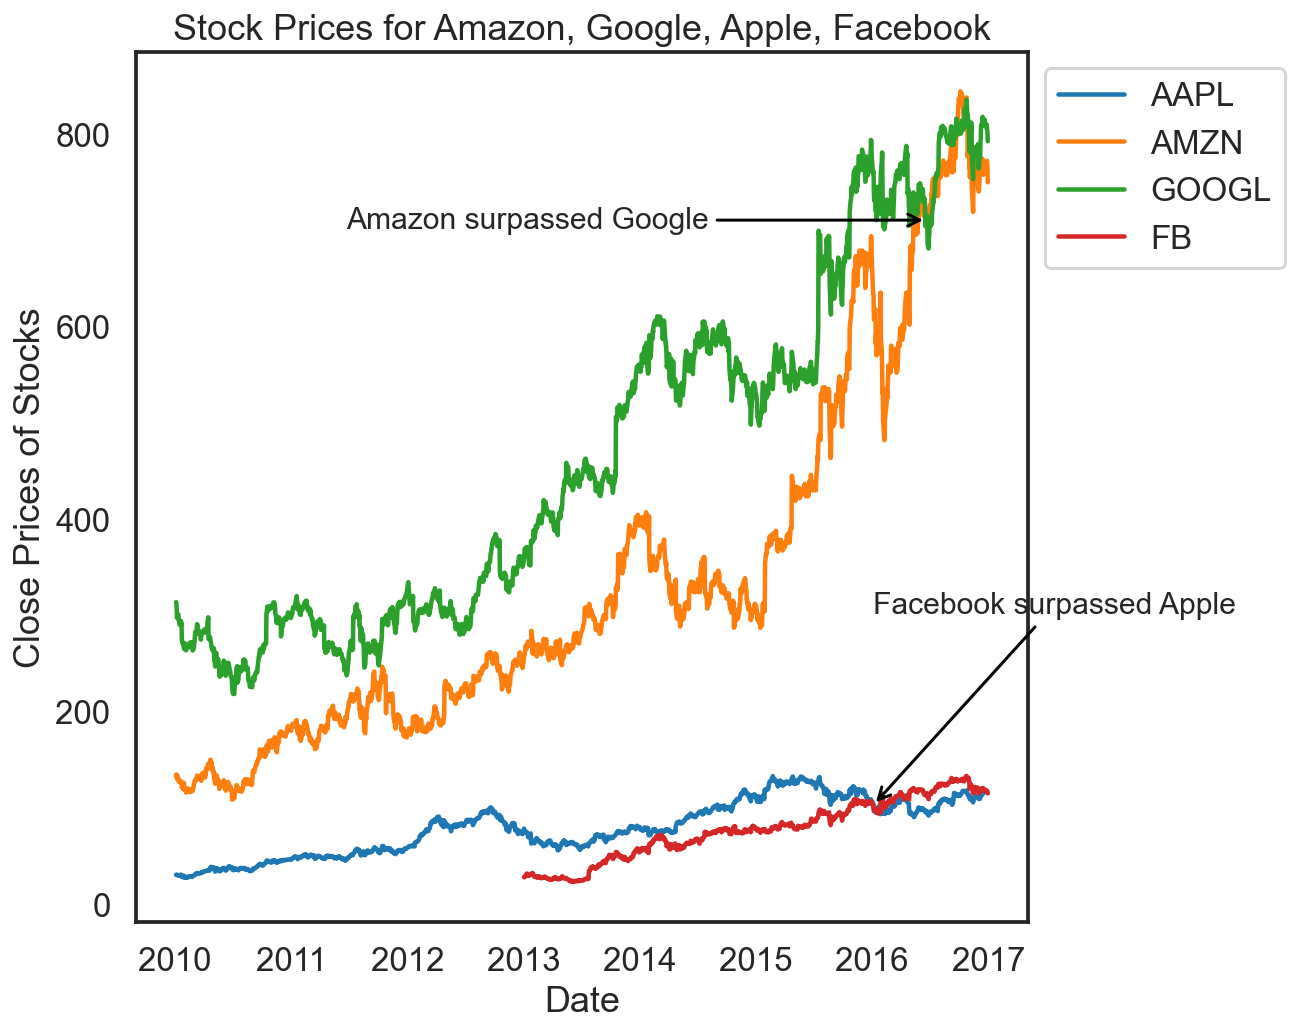

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
# Line plot
sns.lineplot(x=big_four.index, y='close', data=big_four, hue='symbol', ax=ax)
# Annotate Amazon > Google
ax.annotate('Amazon surpassed Google',
            xy=('2016-06-22', 710.599976),
            xycoords='data',
            xytext=(-200, 0),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center',
            fontsize=15)
# Annotate Facebook > Google
ax.annotate('Facebook surpassed Apple',
            xy=('2016-01-05', 102.730003),
            xycoords='data',
            xytext=(0, 100),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            va='center',
            ha='left',
            fontsize=15)
# Move the legend outside of the axes
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
# Final styling
ax.set(xlabel='Date',
       ylabel='Close Prices of Stocks',
       title='Stock Prices for Amazon, Google, Apple, Facebook')
plt.show();

The reason I chose a scatter plot and a line plot for examples is because I already showed how you to annotate bar graphs in another one of my [articles](https://towardsdatascience.com/deep-guide-into-styling-plots-delivering-effective-visuals-12e40107b380?source=your_stories_page-------------------------------------). Please, read that one as a follow-up. I showed how you can place the height of each bar above itself and remove the axes.

Important points to remember: 
1. Always set `xycoords` and `textcoords` to __'data'__ and __'offset points'__. This will give you full control of the reference point and text location. 
2. The coordinate system for `xycoords` places the origin at point (0, 0). For `textcoords`, the origin is the reference point which is defined with `xy`. 
3. For `xy` parameter, pass values which fully match with the values on axis ticks.
4. Arrows between the reference point and the text are created automatically using `arrowprops`.
5. However bad Matplotlib' documentation is, check out their tutorials on how to control text in plots. Being able to read complex documentation is a valuable skill of a programmer.